In [1]:
import scipy
import numpy
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from __future__ import division

from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z


In [2]:
exp1 = np.fromfile("D://big.txt",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (-1,2))
a = exp1.transpose()

(0.14, 0.35)

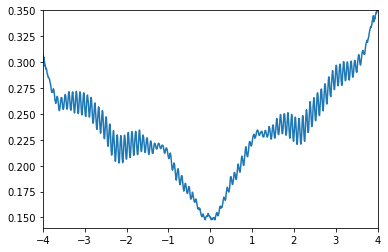

In [3]:
plt.plot(a[0],-a[1]*1E9)
plt.xlim(-4,4)
plt.ylim(0.14,0.35)

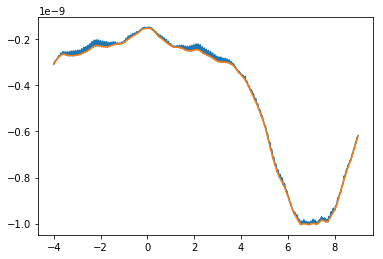

In [6]:
dat=baseline_als(a[1],1000,0.01,500)
plt.plot(a[0],a[1])
plt.plot(a[0],dat)
expt=a[1]-dat

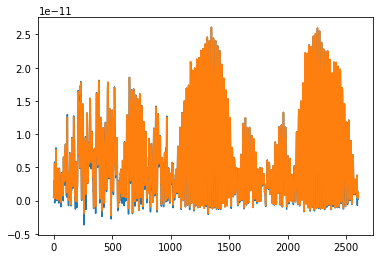

In [27]:
plt.plot(expt)
dat=baseline_als(expt,0.01,0.9,1000)
plt.plot(dat)

In [5]:
exp1 = np.fromfile("D://mag.dat",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (-1,2))
a = exp1.transpose()

IOError: [Errno 2] No such file or directory: 'D://mag.dat'

In [13]:
a

array([[  1.70000000e+02,   1.30000000e+02,   9.00000000e+01,
          4.00000000e+01,   1.00000000e-01,  -4.00000000e+01,
         -9.00000000e+01,  -1.30000000e+02,  -1.70000000e+02],
       [  7.63043478e-02,   6.90000000e-02,   6.37142857e-02,
          5.46666667e-02,   4.00000000e-02,   5.26666667e-02,
          6.47142857e-02,   7.10000000e-02,   7.63043478e-02]])

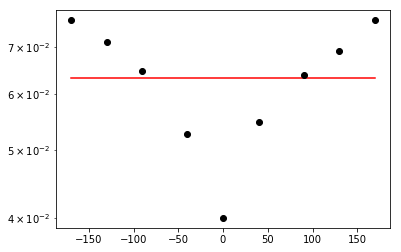

array([  6.31522889e-02,   6.27906692e-11])

In [93]:
import numpy as np
import matplotlib.pyplot as plt
def mag(x):
    return (np.exp(x)-np.exp(-x))/(2*x)
from scipy.optimize import curve_fit
xdata=a[0,0:9]
ydata=a[1,0:9]
def func(x, a, b):
    return a*np.exp(-b*mag(1E-3*x))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [2, 1E-0]))
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.plot(a[0], a[1], 'ok')
plt.yscale('log')
plt.show()
popt

(0.03, 0.1)

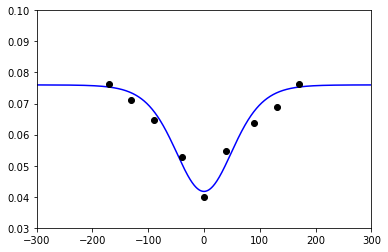

In [146]:
b=0.6
c=0.4E-1
x=np.linspace(-300, 300, num=1000)
#plt.plot(a[0], 0.076*np.exp(-b/mag(c*a[0])), 'r-', label='fit')
plt.plot(x, 0.076*np.exp(-b/mag(c*x)), 'b-', label='fit_cont')
plt.plot(a[0], a[1], 'ok')
plt.xlim(-300,300)
plt.ylim(0.03,0.1)

In [147]:
np.savetxt('D:\\magfinal0.txt', 0.076*np.exp(-b/mag(c*x)), delimiter=' ')